# **CAPM**

In [1]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 11.3 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
import yfinance as yf
import pandas as pd
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
RISKY_ASSET='MSFT'
MARKET_BENCHMARK='^GSPC'
START_DATE='2014-01-01'
END_DATE='2018-12-31'

In [6]:
df=yf.download([RISKY_ASSET,MARKET_BENCHMARK],start=START_DATE,end=END_DATE,adjusted=True,progress=False)
df.head()

Adj Close               ...    Volume            
                 MSFT        ^GSPC  ...      MSFT       ^GSPC
Date                                ...                      
2014-01-02  31.922371  1831.979980  ...  30632200  3080600000
2014-01-03  31.707609  1831.369995  ...  31134800  2774270000
2014-01-06  31.037552  1826.770020  ...  43603700  3294850000
2014-01-07  31.278072  1837.880005  ...  35802800  3511750000
2014-01-08  30.719687  1837.489990  ...  59971700  3652140000

[5 rows x 12 columns]

In [26]:
msft=df['Adj Close'].rename(columns={RISKY_ASSET:'asset',MARKET_BENCHMARK:'market'})\
                    .resample('M')\
                    .last()\
                    .pct_change()\
                    .dropna()
msft.head()

,asset,market
Date,,
2014-02-28,0.020012,0.043117
2014-03-31,0.069956,0.006932
2014-04-30,-0.014394,0.006201
2014-05-31,0.020515,0.021030
2014-06-30,0.018564,0.019058


In [27]:
covariance=msft.cov().iloc[0,1]
benchmark_variance=msft.market.var()
beta=covariance/benchmark_variance
beta

1.27987545228286

In [28]:
y=msft.pop('asset')
x=sm.add_constant(msft)
capm_model=sm.OLS(y,x).fit()
print(capm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  asset   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     45.24
Date:                Tue, 16 Nov 2021   Prob (F-statistic):           9.09e-09
Time:                        13:36:51   Log-Likelihood:                 99.079
No. Observations:                  59   AIC:                            -194.2
Df Residuals:                      57   BIC:                            -190.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0127      0.006      2.078      0.0

In [29]:
N_DAYS=90
df_rf=yf.download('^IRX',start=START_DATE,end=END_DATE)
df_rf.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,0.060,0.060,0.055,0.058,0.058,0
2014-01-03,0.060,0.060,0.058,0.058,0.058,0
2014-01-06,0.055,0.055,0.045,0.045,0.045,0
2014-01-07,0.048,0.048,0.040,0.043,0.043,0
2014-01-08,0.037,0.043,0.035,0.040,0.040,0


In [30]:
rf = df_rf.resample('M').last().Close / 100

# calculate the corresponding daily risk-free return  
rf = ( 1 / (1 - rf * N_DAYS / 360) )**(1 / N_DAYS)  

# convert to monthly and subtract 1
rf = (rf ** 30) - 1 
rf.head()

Date
2014-01-31    0.000008
2014-02-28    0.000036
2014-03-31    0.000023
2014-04-30    0.000017
2014-05-31    0.000025
Freq: M, Name: Close, dtype: float64

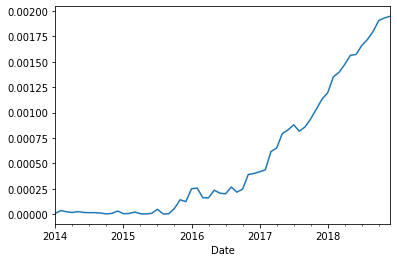

In [31]:
rf.plot()

In [38]:
msft1=df['Adj Close'].rename(columns={RISKY_ASSET:'asset',MARKET_BENCHMARK:'market'})\
                    .resample('M')\
                    .last()\
                    .pct_change()\
                    .dropna()
msft1.head()

,asset,market
Date,,
2014-02-28,0.020012,0.043117
2014-03-31,0.069956,0.006932
2014-04-30,-0.014394,0.006201
2014-05-31,0.020515,0.021030
2014-06-30,0.018564,0.019058


In [39]:
msft1['market']=msft1['market']-rf
msft1['asset']=msft1['asset']-rf
msft1.head()

,asset,market
Date,,
2014-02-28,0.019976,0.043081
2014-03-31,0.069933,0.006909
2014-04-30,-0.014411,0.006184
2014-05-31,0.020490,0.021005
2014-06-30,0.018547,0.019042


In [40]:
y=msft1.pop('asset')
x=sm.add_constant(msft1)
capm_model=sm.OLS(y,x).fit()
print(capm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  asset   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     45.23
Date:                Tue, 16 Nov 2021   Prob (F-statistic):           9.12e-09
Time:                        13:41:01   Log-Likelihood:                 99.055
No. Observations:                  59   AIC:                            -194.1
Df Residuals:                      57   BIC:                            -190.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0128      0.006      2.113      0.0